# Credit card fraud detection

## Imports

In [21]:
# Dataset
import pandas as pd

# Graph
import plotly.express as px
import matplotlib.pyplot as plt

# Vectorizing and spliting
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Visualization
from sklearn.manifold import TSNE
from umap import UMAP
from PIL import Image

# Test hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Classifications
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Metric
from sklearn.metrics import silhouette_score
from sklearn.manifold import trustworthiness

# Math
from operator import itemgetter 

# Imbalanced dataset
from imblearn.over_sampling import SMOTE  # type: ignore

## Read files

In [8]:
!unzip 'data/creditcard.zip' -d 'data'

Archive:  data/creditcard.zip
  inflating: data/creditcard.csv     


In [2]:
df = pd.read_csv("data/creditcard.csv")

In [3]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [4]:
def balance_dataset(X, y):
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)

    return X, y

### Using PCA + 'Amount'

Limit to 8000 rows

In [14]:
X_df = df.drop(['Time', 'Class'], axis=1)[:8000]
y_df = df['Class'][:8000]

Divide the dataset in train and test data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=0)

print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)

X_train.shape (6000, 29)
X_test.shape (2000, 29)


In [42]:
X_train

V1        V2        V3        V4        V5        V6        V7  \
286   1.182399  0.059489  0.310673  0.828817  0.341209  1.112593 -0.292778   
6696 -0.653643  1.108776  1.721026  0.108708 -0.140059 -0.557997  0.669051   
6486  1.084120 -0.588713  1.073776  0.321855 -1.095569  0.153922 -0.878359   
1145 -0.267135  1.023874  1.244017  0.860266  0.436054 -0.161261  0.709736   
6346 -1.678182  2.427569  1.161725  0.901255  0.034223  0.988646 -0.585198   
...        ...       ...       ...       ...       ...       ...       ...   
4931 -0.239635  1.008593  1.977233  1.066620  0.201836 -0.338452  0.672981   
3264 -0.628115  0.364359  2.147474  0.015602 -0.378201  0.798600  0.120882   
1653 -0.992592  1.304997  0.639358 -0.171221 -0.066538 -0.109204  0.058314   
2607 -0.667351 -0.167788  1.241277 -1.524555 -1.048869  0.995735  0.274662   
2732 -2.181204  1.505528  0.705044  1.484834 -1.060910  1.094772 -1.146884   

            V8        V9       V10  ...       V20       V21       V22  \
286   0.287394  0.268307 -0.087575  ... -0.061463 -0.337818 -0.776840   
6696 -0.098444  0.622254 -0.439212  ...  0.065242 -0.296760 -0.603696   
6486  0.209006  2.469380 -0.636429  ... -0.078082 -0.336952 -0.696793   
1145 -0.037677 -1.080828 -0.012943  ...  0.148679  0.193634  0.598219   
6346 -4.224410  1.368863  0.487594  ... -0.403375  3.513129 -1.445011   
...        ...       ...       ...  ...       ...       ...       ...   
4931 -0.244372  0.920744 -0.441016  ... -0.074542 -0.105023  0.141641   
3264  0.219954 -0.040746 -0.583602  ...  0.385660  0.243374  0.572608   
1653  0.754982 -0.380338 -0.258132  ...  0.020541 -0.213179 -0.684212   
2607  0.159642 -1.092677  0.469758  ... -0.615208 -0.374554 -0.588950   
2732  1.819827  0.679563 -0.482573  ...  0.051110 -0.370289 -0.813721   

           V23       V24       V25       V26       V27       V28  Amount  
286  -0.056486 -1.356986  0.475790 -0.546519  0.063035  0.008047   12.99  
6696  0.021575  0.467618 -0.270149 -0.010464  0.126618  0.091351   44.99  
6486  0.005663 -0.026505  0.056679  0.906213 -0.084941  0.001054   65.27  
1145 -0.234705 -0.010555 -0.124718 -0.262974  0.163700  0.142549   14.81  
6346  0.341371 -0.584021 -0.040219 -0.360915  0.537836  0.065131   36.00  
...        ...       ...       ...       ...       ...       ...     ...  
4931 -0.090261  0.313507 -0.443431 -0.470999 -0.016476 -0.081032    2.50  
3264 -0.259820 -0.951589  0.245420  0.793208  0.037767  0.078380   99.40  
1653  0.034348 -0.404517 -0.198830  0.116588  0.237704  0.064507    8.91  
2607  0.117503 -0.853818 -0.888040  0.818370 -0.039758  0.067833  170.55  
2732 -0.070665 -0.794725  0.186404 -0.303576  0.280963  0.074057   13.98  

[6000 rows x 29 columns]

Analyzing the proportion of fraudulent samples:

In [43]:
y_train.value_counts(normalize=True)

0    0.997833
1    0.002167
Name: Class, dtype: float64

The fraudulent samples are approximately 3% of the dataset, so we are dealing with an unbalanced dataset.

We'll have to apply an oversampling or undersampling technique. In this case, SMOTE() is applied.

In [44]:
X_train, y_train = balance_dataset(X_train, y_train)

In [45]:
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Class, dtype: float64

Now, we can see that the train values are balanced, both fraudulent and non-fraudulent samples have the proportion of 50%.

In [46]:
X_train

V1        V2        V3        V4        V5        V6        V7  \
0      1.182399  0.059489  0.310673  0.828817  0.341209  1.112593 -0.292778   
1     -0.653643  1.108776  1.721026  0.108708 -0.140059 -0.557997  0.669051   
2      1.084120 -0.588713  1.073776  0.321855 -1.095569  0.153922 -0.878359   
3     -0.267135  1.023874  1.244017  0.860266  0.436054 -0.161261  0.709736   
4     -1.678182  2.427569  1.161725  0.901255  0.034223  0.988646 -0.585198   
...         ...       ...       ...       ...       ...       ...       ...   
11969 -1.517289 -0.947125 -1.510547  2.984732  0.108488 -1.335060 -1.413257   
11970 -2.042646  2.441895 -3.625695  2.726990 -1.591011 -2.140100 -3.565740   
11971 -2.878101  3.694207 -4.858339  5.179976  0.035627 -2.258443 -2.800980   
11972 -2.621452  5.836290 -7.642354  6.384896 -0.062153 -3.133095 -3.103886   
11973 -0.900212  3.139344 -5.229865  3.646384 -2.220985 -2.308992 -4.464613   

             V8        V9       V10  ...       V20       V21       V22  \
0      0.287394  0.268307 -0.087575  ... -0.061463 -0.337818 -0.776840   
1     -0.098444  0.622254 -0.439212  ...  0.065242 -0.296760 -0.603696   
2      0.209006  2.469380 -0.636429  ... -0.078082 -0.336952 -0.696793   
3     -0.037677 -1.080828 -0.012943  ...  0.148679  0.193634  0.598219   
4     -4.224410  1.368863  0.487594  ... -0.403375  3.513129 -1.445011   
...         ...       ...       ...  ...       ...       ...       ...   
11969  0.390392 -0.358071 -2.371808  ...  1.455387  0.632530  0.303496   
11970  1.433377 -1.262225 -6.065667  ...  0.624974  0.666982 -0.371933   
11971  0.527443 -2.175401 -6.741342  ...  0.342838  0.564825 -0.196629   
11972  1.792825 -3.846372 -7.225627  ...  0.402175  0.728991 -0.439796   
11973  1.447365 -0.993240 -6.108344  ...  0.532427  0.695294 -0.213474   

            V23       V24       V25       V26       V27       V28      Amount  
0     -0.056486 -1.356986  0.475790 -0.546519  0.063035  0.008047   12.990000  
1      0.021575  0.467618 -0.270149 -0.010464  0.126618  0.091351   44.990000  
2      0.005663 -0.026505  0.056679  0.906213 -0.084941  0.001054   65.270000  
3     -0.234705 -0.010555 -0.124718 -0.262974  0.163700  0.142549   14.810000  
4      0.341371 -0.584021 -0.040219 -0.360915  0.537836  0.065131   36.000000  
...         ...       ...       ...       ...       ...       ...         ...  
11969  1.062178 -0.322511 -0.579815  0.055998  0.090332  0.061521  315.197670  
11970  0.198272  0.015357  0.092059  0.236612  0.316301  0.182612   81.060523  
11971 -0.412682 -0.256067  0.633760  0.039697  0.174436  0.691521    1.037976  
11972 -0.390418 -0.286919  1.009157  0.417286  0.322847  0.305304    1.000000  
11973  0.346155  0.077477 -0.931648  0.315494  0.587483  0.240734    1.000000  

[11974 rows x 29 columns]

In [47]:
distance_euclidean = pairwise_distances(X_train, metric='euclidean')

### Using only PCA

Repeat the same process to PCA attributes

In [5]:
X_pca_df = df.drop(['Time', 'Class', 'Amount'], axis=1)[:8000]
y_pca_df = df['Class'][:8000]

In [6]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca_df, y_pca_df, test_size=0.25, random_state=0)

print('X_train.shape', X_pca_train.shape)
print('X_test.shape', X_pca_test.shape)

X_train.shape (6000, 28)
X_test.shape (2000, 28)


In [7]:
y_pca_train.value_counts(normalize=True)

0    0.997833
1    0.002167
Name: Class, dtype: float64

In [8]:
X_pca_not_balanced_train = X_pca_train
y_pca_not_balanced_train = y_pca_train

In [9]:
X_pca_train, y_pca_train = balance_dataset(X_pca_train, y_pca_train)

In [10]:
y_pca_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Class, dtype: float64

## Visualizations

In [11]:
def plotFigure(data, y):
  
  # Assign data of lists.  
  data = {'x': list(map(itemgetter(0), data)), 
          'y': list(map(itemgetter(1), data))} 
  
  # Create DataFrame  
  df = pd.DataFrame(data)

  # Create figure
  fig = px.strip(
    data_frame=df,
    x='x',
    y='y',
    hover_name=y,
    color=y,
    hover_data={'x': False, 'y': False}
  )
  
  fig.update_yaxes(color='white', showticklabels=False, showline=True, linewidth=1, linecolor='black', mirror=True)
  fig.update_xaxes(color='white', showticklabels=False, showline=True, linewidth=1, linecolor='black', mirror=True)
  fig.update_layout(plot_bgcolor= 'rgba(0, 0, 0, 0)')

  return fig

### t-SNE

#### Distance euclidean (PCA + 'Amount') visualization

In [25]:
tsne = TSNE(perplexity=500, metric='precomputed').fit_transform(distance_euclidean)

In [26]:
fig = plotFigure(tsne, y_train.replace([1, 0],['Fraud', 'Not fraud']))
print('T-distributed Stochastic Neighbor Embedding (TSNE)')
fig.show()

T-distributed Stochastic Neighbor Embedding (TSNE)


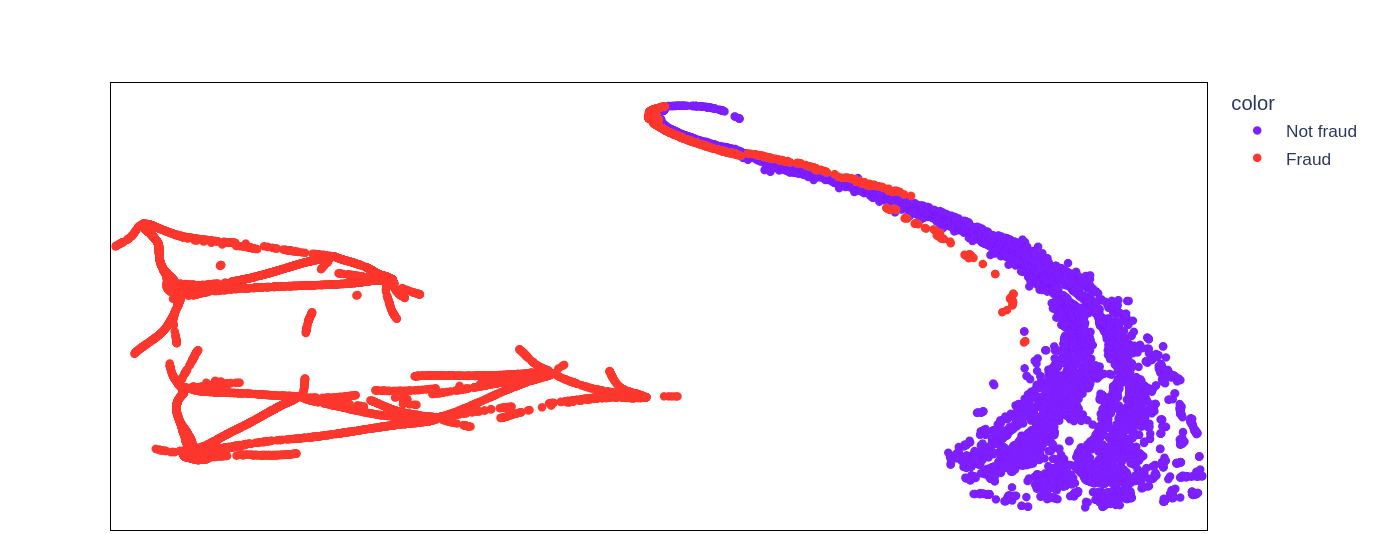

In [17]:
euclidean_dist_not_balanced_tsne = Image.open('results/euclidean_dist_not_balanced_tsne.png')    # Open image as PIL image object
euclidean_dist_not_balanced_tsne

#### PCA visualization with balanced data

In [12]:
pca_tsne = TSNE(perplexity=500).fit_transform(X_pca_train)

In [13]:
fig = plotFigure(pca_tsne, y_pca_train.replace([1, 0],['Fraud', 'Not fraud']))
print('T-distributed Stochastic Neighbor Embedding (TSNE)')
fig.show()

T-distributed Stochastic Neighbor Embedding (TSNE)


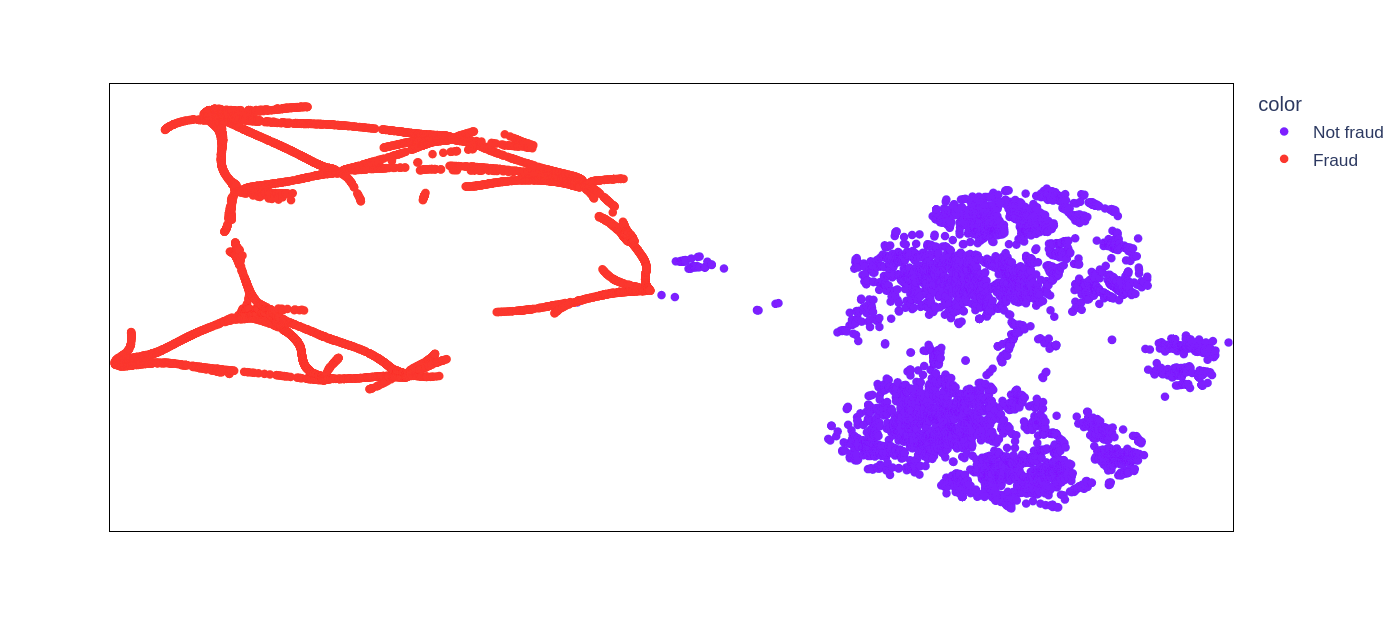

In [15]:
pca_tsne = Image.open('results/pca_tsne.png')
pca_tsne

By visual analysis, the PCA visualization separated fraud and not fraud samples in a better way then PCA+'Amount' visualization

#### PCA visualization with unbalanced data

In [34]:
pca_not_balanced_tsne = TSNE(perplexity=300).fit_transform(X_pca_not_balanced_train)

In [35]:
fig = plotFigure(pca_not_balanced_tsne, y_pca_not_balanced_train.replace([1, 0],['Fraud', 'Not fraud']))
print('T-distributed Stochastic Neighbor Embedding (TSNE)')
fig.show()

T-distributed Stochastic Neighbor Embedding (TSNE)


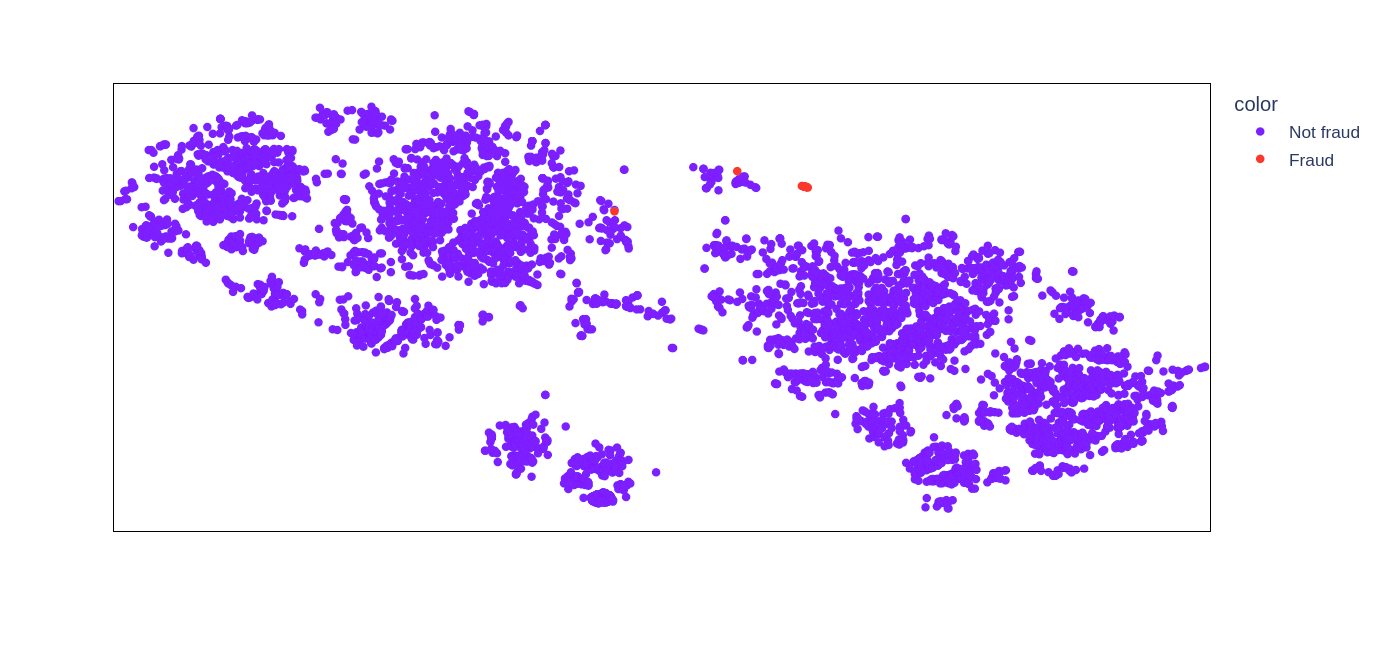

In [66]:
pca_not_balanced_tsne = Image.open('results/pca_not_balanced_tsne.png')    # Open image as PIL image object
pca_not_balanced_tsne

### UMAP

#### PCA visualization with balanced data

In [127]:
pca_umap = UMAP(n_neighbors=50, min_dist=0.1).fit_transform(X_pca_train)

In [128]:
fig = plotFigure(pca_umap, y_pca_train.replace([1, 0],['Fraud', 'Not fraud']))
print('T-distributed Stochastic Neighbor Embedding (TSNE)')
fig.show()

T-distributed Stochastic Neighbor Embedding (TSNE)


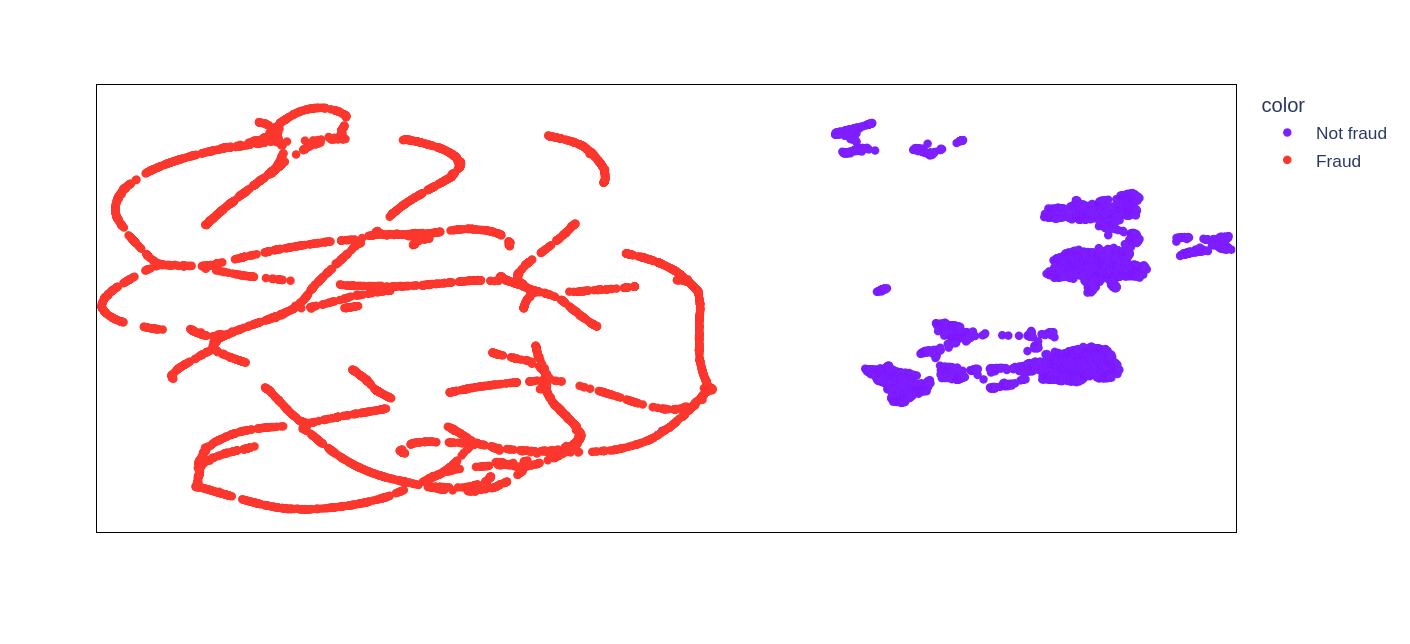

In [16]:
pca_umap = Image.open('results/pca_umap.png')
pca_umap

#### PCA visualization with unbalanced data

In [29]:
pca_not_balanced_umap = UMAP(n_neighbors=50, min_dist=0.1).fit_transform(X_pca_not_balanced_train)

In [30]:
fig = plotFigure(pca_not_balanced_umap, y_pca_not_balanced_train.replace([1, 0],['Fraud', 'Not fraud']))
print('T-distributed Stochastic Neighbor Embedding (TSNE)')
fig.show()

T-distributed Stochastic Neighbor Embedding (TSNE)


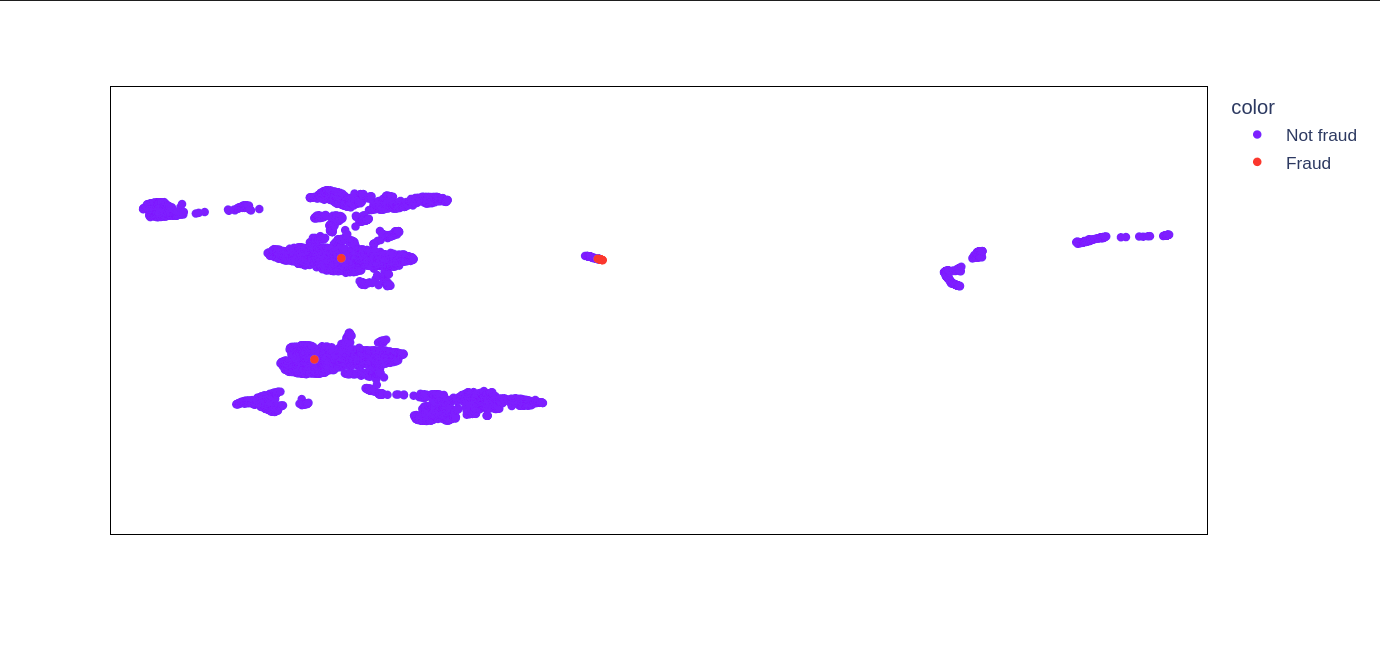

In [14]:
pca_not_balanced_umap = Image.open('results/pca_not_balanced_umap.png')
pca_not_balanced_umap

## Classifications

### Test hypermarameters

In [ ]:
def test_hyperparameters(classifier, X_train, y_train):
    parameters = {}
    classification = None

    if classifier == 'Random Forest':
        parameters = {'n_estimators': [100, 300, 500], "max_depth": [
            3, 5, 7, None], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']}
        classification = RandomForestClassifier(random_state=0)
    elif classifier == 'Naive Bayes':
        parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}
        classification = MultinomialNB()
    elif classifier == 'SVM':
        parameters = {'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], "C": [1, 10, 100, 1000]}
        classification = SVC(random_state=0)

    score = 'f1'

    print("# Defining hyperparameters based on %s" % score)
    print()

    clf = RandomizedSearchCV(classification, parameters, scoring="%s_macro" % score, cv=5, random_state=0)
    clf.fit(X_train, y_train)

    print("Best hyperparameters:")
    print()
    print(clf.best_params_)

In [ ]:
# test_hyperparameters('Naive Bayes', X_tfidf_train_h, tweets_train_df['Label'])

In [ ]:
# test_hyperparameters('Support Vector Machine', X_tfidf_train_h, tweets_train_df['Label'])

In [ ]:
# test_hyperparameters('Random Forest', X_tfidf_train_h, tweets_train_df['Label'])

### Classification

In [ ]:
# def createClassifier(classifier, x_train, y_train, x_test, y_test):
#     # Create classifier
#     classifier.fit(x_train, y_train)

#     # Define test labels
#     y_true, y_pred = y_test, classifier.predict(x_test)

#     print('Classification report: ')
#     print(classification_report(y_true, y_pred, zero_division=1))
    
#     return y_test

In [ ]:
# def plotConfusionMatrix(classifier, x_test, y_test):
#     ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test, cmap=plt.cm.Blues)
#     plt.show()

#     return;

Naive Bayes

In [ ]:
# nb_clf = MultinomialNB(alpha=1)

# y_pred = createClassifier(nb_clf, X_tfidf_train, y_tweets_train_df, 
#                           X_tfidf_test, y_test)

# print('Confusion Matrix: ')
# plotConfusionMatrix(nb_clf, X_tfidf_test, y_test)

Support Vector Machine

In [ ]:
# svm_clf = SVC(kernel='rbf', C=10)

# y_pred = createClassifier(svm_clf, X_tfidf_train, y_tweets_train_df, 
#                           X_tfidf_test, y_test)

# print('Confusion Matrix: ')
# plotConfusionMatrix(nb_clf, X_tfidf_test, y_test)

Random Forest

In [ ]:
# rf_clf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=None, criterion='gini')

# y_pred = createClassifier(rf_clf, X_tfidf_train, y_tweets_train_df, 
#                           X_tfidf_test, y_test)

# print('Confusion Matrix: ')
# plotConfusionMatrix(nb_clf, X_tfidf_test, y_test)